In [179]:
import numpy as np
import scipy
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart, rotate
from skimage.draw import line_aa
import cv2
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import sewar
%matplotlib inline

In [205]:
img = cv2.imread("../images/pat.png",0)
img = cv2.resize(img,(480,480))

# imgo = np.copy(img)
rows,cols = img.shape
M = np.float32([[1,0,50],[0,1,0]])
# img = cv2.warpAffine(img,M,(cols,rows))
# img[:,0:50] = imgo[:,:430:480]
# img = rotate(img, 23,resize=True)
# img = cv2.resize(img,(480,480))

imgo = np.copy(img)
# img = np.ones((480,480), dtype='uint8')*255
imsize = img.shape
print(imsize)

(480, 480)


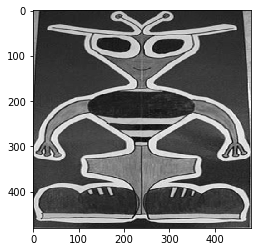

In [206]:
plt.imshow(img, cmap='gray')

(480, 180)


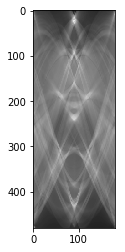

In [207]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
# print(theta1)
sinogram1 = radon(img, theta=theta1, circle=True)
plt.imshow(sinogram1, cmap='gray')
imsize = sinogram1.shape
print(imsize)

(480,)


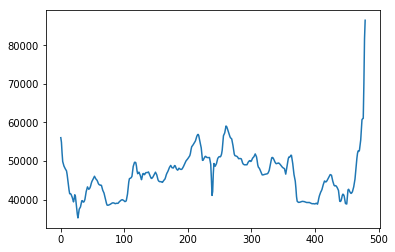

27


In [212]:
b = sinogram1[:,0]
# b[259] = b[259]*2
print(b.shape)
# print(b)
# print(np.mean(b))
plt.plot(b) # plotting by columns
plt.show()
min_idxb = np.argmin(b)
print(min_idxb)

In [209]:
min_angles = []
for k in range(180):
    
    b = sinogram1[:,k]
    conv_sz = [51,101,151]
    ans = np.zeros(np.shape(b)[0])
    for i in range(len(conv_sz)):
        for j in range(int(conv_sz[i]/2)):
            vec = np.zeros(conv_sz[i])
            vec[j] = 1 + j
            vec[conv_sz[i] - 1 -j] = -1-j
            ans = np.add(ans, abs(np.convolve(vec,b,mode='same')))
    #restrict to center
    ans_m = ans
#     ans_m = ans[30:60]
    center = np.argmin(ans_m)
    min_val = min(ans_m)
#     if center <220 or center > 240:
#         min_val = min_val*10000
        
    min_angles.append(min_val/len(conv_sz))
        
    print('angle: ',k,'Val: ',min_val/len(conv_sz),'At arg: ',center)
    # print(np.shape(ans))
#     print(np.argmin(ans))


angle:  0 Val:  2175698.0 At arg:  238
angle:  1 Val:  2888050.383603221 At arg:  85
angle:  2 Val:  3114071.5957637466 At arg:  81
angle:  3 Val:  2688430.8676944277 At arg:  80
angle:  4 Val:  2435592.0442318157 At arg:  80
angle:  5 Val:  2206345.2204319835 At arg:  268
angle:  6 Val:  1950401.247652273 At arg:  270
angle:  7 Val:  2263815.96622232 At arg:  260
angle:  8 Val:  2555554.7125757867 At arg:  266
angle:  9 Val:  1864490.5406106731 At arg:  267
angle:  10 Val:  1699059.783863851 At arg:  267
angle:  11 Val:  2627349.0571274217 At arg:  269
angle:  12 Val:  3181217.992241916 At arg:  271
angle:  13 Val:  3673065.178825915 At arg:  263
angle:  14 Val:  3225461.462363077 At arg:  267
angle:  15 Val:  2916600.5924448348 At arg:  360
angle:  16 Val:  2747105.5734710153 At arg:  272
angle:  17 Val:  2148183.829660805 At arg:  271
angle:  18 Val:  2652817.225044195 At arg:  262
angle:  19 Val:  2553700.899483622 At arg:  263
angle:  20 Val:  2481312.659618032 At arg:  262
angle:

angle:  169 Val:  2336895.4581596423 At arg:  271
angle:  170 Val:  1370257.7799276107 At arg:  270
angle:  171 Val:  2265787.089103145 At arg:  269
angle:  172 Val:  2555684.9006134034 At arg:  189
angle:  173 Val:  2347421.249364013 At arg:  189
angle:  174 Val:  2154366.1517427415 At arg:  81
angle:  175 Val:  2372845.7892232924 At arg:  82
angle:  176 Val:  2628334.8163888413 At arg:  83
angle:  177 Val:  2791908.375747349 At arg:  176
angle:  178 Val:  3105038.8189882017 At arg:  167
angle:  179 Val:  3483840.9486893024 At arg:  88


In [210]:
# print(min_angles)
print(np.argmin(min_angles))
# for h in range(180):
#     if min_angles[h]<91000:
#         print(h)
#         print(min_angles[h])

134


(480, 480)


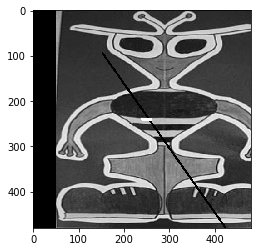

In [204]:
ang = 35
sym_pt = 291

print(np.shape(imgo))
img = np.copy(imgo)
# img = cv2.resize(img,(64,64))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(0,0,0),3)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




In [105]:
sinogram1t = np.flipud(sinogram1)
diff = np.abs(sinogram1 - sinogram1t)
diff_col = np.mean(diff,axis=0)
print(diff_col)
print(np.shape(diff_col))
min_idx = np.argmin(diff_col)
print(min_idx)

[ 3976.01666667  4191.71258687  4390.57023427  4571.00735922
  4819.85104967  5155.7738808   5524.04136161  5960.92225905
  6412.61780278  6854.12814583  7315.26531394  7792.32931493
  8291.00963541  8757.19891513  9122.43692011  9426.26529559
  9668.67257699  9857.85738166 10012.55180051 10134.8514526
 10250.04765549 10330.8580199  10338.2641037  10267.96035808
 10178.29600978 10138.72924578 10154.91963661 10291.34170646
 10496.95542724 10780.01792859 11168.91496394 11614.83762229
 11983.19209268 12346.08578539 12706.70264915 13059.67942644
 13459.88201998 13983.54800665 14494.30571259 14988.28479531
 15414.69913159 15768.13763891 16122.47832632 16544.5114069
 17163.53416664 17840.15475335 18616.96438118 19714.52290579
 20714.21304127 21486.89907365 21979.00339519 22334.06706465
 22664.26323869 22981.78467825 23166.97528517 23004.42447296
 22733.29109423 22443.92144696 22127.54854038 21721.28793564
 21112.85731594 20263.46871942 19273.0770251  18489.36710366
 18026.1731727  17536.6598

In [190]:
count = 0
d = np.zeros(30)
for i in range(1,179):
    if(diff_col[i] < diff_col[i-1] and diff_col[i] < diff_col[i+1] and diff_col[i]<diff_col[min_idx] *5):
        print(i)
        d[count]=i
        count=count+1;
print("count", count)

5
54
123
171
176
count 5


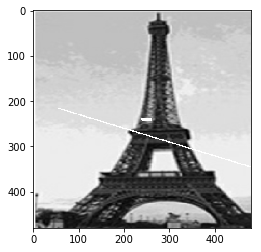

In [266]:
img = cv2.imread("../images/ball90.png",0)
ang = 73
sym_pt = 286
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(255,255,255),2)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




In [271]:
# img = np.copy(imgo)
# img = cv2.resize(img,(480,480))
# img = cv2.line(img,(240 + s0,240 - c0),(240 - s0,240 + c0),(0,0,0),5)
# img = cv2.line(img,(231,480),(231,0),(255,255,255),2)
# plt.imshow(img, cmap='gray')




In [61]:
a = [1, 2, 3, 4,3,2,3,5,6,7,1 ]
b = [1 ,0 ,-1]
c = np.convolve(a,b,mode='same')
print(c)

[ 2  2  2  0 -2  0  3  3  2 -5 -7]
